# Two Pt BVP Via Finite Differences


If we're solving $-u_{xx}=f(u,u_x,x)$, $u(x=0)=u_0$, $u(x=1)=u_1$, 
we discretize $-u_{xx}$ via a central finite difference approximation
at a predetermined set of grid points $x_1$, $x_2$, \ldots, $x_n$, the points lying on the interior of $(0,1)$.  

As we will see, it is often convenient to take them equispaces, such that $x_{i}-x_{i-1}=h$, $h$ fixed.  If we do this we get

$$
\frac{2u_i-u_{i-1}-u_{i+1}}{h^2} = f(u_i,x_i).
$$

If we combine this with the known boundary values we have $n$ equations for each interior grid point.  The resulting linear algebra system (for zero BC's) looks like:

$A\in\mathbb{R}^{n\times n}$ is given by
$$
\large A = \left(
                \begin{array}{ccccc}
                    2 & -1 & 0 & \cdots & 0 \\
                    -1 & 2 & -1 & \ddots & \vdots \\
                    0 & \ddots & \ddots & \ddots & 0 \\
                    \vdots & \ddots & -1 & 2 & -1 \\
                    0 & \cdots & 0 & -1 & 2
                \end{array}
           \right)
$$
and the data vector is given by
$$
\large b = h^2\left(
                    \begin{array}{c} 
                        f(x_1) \\
                        f(x_2) \\
                        \vdots \\
                        f(x_n)
                    \end{array}
                \right).
$$



To test this, we pick $u=x(1-x)e^x$, so that $u_{x}=e^x(x-x^2+1-2x)$
and $u_{xx}=e^x(1-x-x^2)+e^x(-1-2x)$ so $-u_{xx}$ simplifies to
$e^x(3x+x^2)=f$.

In [5]:
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt

n = 5
A = np.zeros((n,n))
print(A.shape)

np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)
print(A)

(5, 5)
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


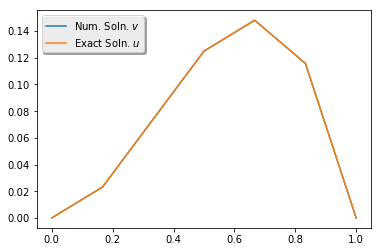

In [8]:
x = np.linspace(0,1,n+2)
h = x[1]-x[0]
#b = h**2 * (3*x+x**2)*np.exp(x)
b = h**2 * (-2+6*x)

v = np.zeros(n+2)
v[1:-1] = np.linalg.solve(A, b[1:-1]) #Numerical soln. using Gaussian elimination

#u = x*(1-x)*np.exp(x) #Exact soln.

pp=np.linspace(0,1,1000)
ut=pp*(1-pp)*np.exp(pp)
u = x**2*(1-x)
plt.figure(1)
plt.plot(x,v,label='Num. Soln. $v$')
plt.plot(x,u,label='Exact Soln. $u$')
plt.legend(loc='upper left', shadow=True)
plt.show()

## plt.plot(x,v-u)

   n    &    h     &      E_h     &   Rate of Conv. \\ \hline
   5    &   0.167  & 0.00588534   &            \\
  10    &   0.091  & 0.00178473   &   1.9685   \\
  20    &   0.048  & 0.00049105   &   1.9957   \\
  40    &   0.024  & 0.00012883   &   1.9999   \\
  80    &   0.012  & 0.00003302   &   1.9996   \\


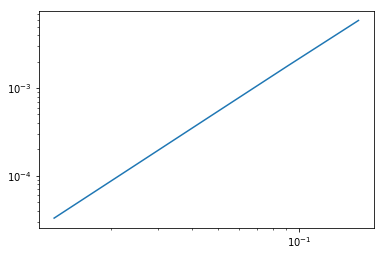

In [3]:
n = [5, 10, 20, 40, 80]
E_h = np.zeros(5)
h = np.zeros(5)
alpha_h = np.zeros(5)

count = 0
print('   n    &    h     &      E_h     &   Rate of Conv. ' + r'\\ \hline')
for n in n:
    A = np.zeros((n,n))
    np.fill_diagonal(A,2)
    A += np.diag(-np.ones(n-1),k=1)
    A += np.diag(-np.ones(n-1),k=-1)
    
    x = np.linspace(0,1,n+2)
    h[count] = x[1]-x[0]
    b = h[count]**2 * (3*x+x**2)*np.exp(x)

    v = np.zeros(n+2)
    v[1:-1] = np.linalg.solve(A, b[1:-1]) #Numerical soln. using Gaussian elimination

    u = x*(1-x)*np.exp(x) #Exact soln.
    
    E_h[count] = np.max(np.abs(u-v))
    
    if count == 0:
        print(' %3d    &   %.3f  & %.8f   &         ' % (n, h[count], E_h[count]) + r'   \\')
    else:
        alpha_h[count] = np.log(E_h[count]/E_h[count-1])/np.log(h[count]/h[count-1])
        print(' %3d    &   %.3f  & %.8f   &   %.4f ' % (n, h[count], E_h[count], alpha_h[count]) + r'  \\')
    
    count +=1
plt.loglog(h,E_h)
plt.show()

##  Discrete Error Measures: 

Let's define a function for computing the discrete inner product for functions just based on grid values.  Note that this is precisely the trapezoidal rule applied to 
$$
\int_0^1 u(x) v(x) \; dx
$$
using the grid points to define the intervals.

In [4]:
def inner_h(u,v,h):
    z = h * (u[0]*v[0] + u[-1]*v[-1])/2.0 + h*np.dot(u[1:-1],v[1:-1])
    return z

Note that the corresponding norm $\| u_h \|$ is simply $\sqrt{<u_h,u_h>_h}$.  